# Minimal lasagne (multilayer percetron)
In this script, we build a small Multilayer Percetron with two hidden layers having 500 and 50 neurons. But first we have to load the data.

## Loading the data
A subset of the first 4000 MNIST data-points is provided in the repository for convenience. For Lasagne all images must be provided in a 4-dimensional array X with the following dimensions (number of images, number of colors, x, y) and the labels in a vector y of same size. So X[1,0,1,2] would be the image number 1, the color chanel 0 and the pixel x = 1 and y=2. 

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot

import cPickle as pickle
with open('../data/mnist_4000.pkl.gz', 'rb') as f:
    X = pickle.load(f)


UnpicklingError: invalid load key, ''.

### Loading of the data (from scartch)
The python script data/load_mnist.py contains functions to load the complete mnist data from the original source. The data can be downloaded from http://deeplearning.net/data/mnist/mnist.pkl.gz.

Uncomment the following code if you whish to use the original (larger) file.

In [7]:
#from create_mnist import load_data_2d
#X,y,PIXELS = load_data_2d('/home/dueo/dl-playground/data/mnist.pkl.gz')
#X.shape, y

X contains the images and y contains the labels.

In [3]:
X.shape,y.shape

((70000, 1, 28, 28), (70000,))

The data is normalized so that each pixel has mean 0 and sd close to 1 using 
(X-Xmean)/(XStd + 0.01)

In [4]:
np.mean(X[0,0,:,:]),np.mean(X[:,0,1,1]),np.mean(X[:,0,2,1]),np.var(X[:,0,10,10])

(0.046298616, 0.0, 0.0, 0.95541364)

##### Let s plot the first few images and label


In [5]:
y[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int32)

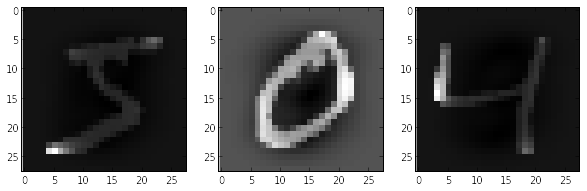

In [6]:
fig = plt.figure(figsize=(10,30))
for i in range(3):
    a=fig.add_subplot(1,3,(i+1))
    plt.imshow(X[i,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))

### Our first Simple Network
Now since we have loaded our data. Let's train a network with it. First we load the necessary libraries and then simply build our network. 
#### Definition of the network
There are serveral ways to define a network. We do the easiest using `NeuralNet` from `nolearn.lasagne`. 

In [7]:
from lasagne import layers
from lasagne import nonlinearities
from nolearn.lasagne import NeuralNet

net1 = NeuralNet(
    # Geometry of the network
    layers=[
        ('input', layers.InputLayer),
        ('hidden1', layers.DenseLayer),
        ('hidden2', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, PIXELS, PIXELS), #None in the first axis indicates that the batch size can be set later
    hidden1_num_units=500,
    hidden2_num_units=50,
    output_num_units=10, output_nonlinearity=nonlinearities.softmax,

    # learning rate parameters
    update_learning_rate=0.01,
    update_momentum=0.9,
    regression=False,
    # We only train for 10 epochs
    max_epochs=100,
    verbose=1,

    # Training test-set split
    eval_size = 0.2
    )

####Training of the net. 
Note that the data is split automatically into 80% Training and 20% Testset. We don't have to take care about this. Since it takes quite a while to finish an epoch (at least with a CPU), we reduce the data to 1000 samples (800 training and 200 testing). Note also that the geometry makes sense the first 3x3 convolution knocks off 2 pixels from the 28x28 images resulting in 26x26 images. Then the maxpooling with size 2x2 reduces these images to 13x13 pixels...

In [8]:
net = net1.fit(X[0:1000,:,:,:],y[0:1000])

  InputLayer        	(None, 1, 28, 28)   	produces     784 outputs
  DenseLayer        	(None, 500)         	produces     500 outputs
  DenseLayer        	(None, 50)          	produces      50 outputs
  DenseLayer        	(None, 10)          	produces      10 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    2.204276  |    1.698991  |     1.297403  |     47.76%  |  0.0s
     2  |    1.164265  |    1.100302  |     1.058132  |     67.91%  |  0.0s
     3  |    0.631630  |    0.764123  |     0.826608  |     76.15%  |  0.0s
     4  |    0.393097  |    0.623480  |     0.630488  |     81.93%  |  0.0s
     5  |    0.277009  |    0.565576  |     0.489781  |     83.76%  |  0.0s
     6  |    0.207044  |    0.534257  |     0.387536  |     85.20%  |  0.0s
     7  |    0.159373  |    0.514241  |     0.309918  |     86.64%  |  0.0s
     8  |    0.126394  |    0.501661  |     0.2

As a remark, trainig longer 100 epochs and with 50k of the data, we get about 97.36% accuracy.

We have a trained classifier with which we can make predictions.

### Evaluate the model
We now make predictions on unseen data. We have trained only on the images 0-1000 so let's take the images 1001 to 1011 and do a prediction.

In [9]:
toTest = range(1001,1011)
preds = net1.predict(X[toTest,:,:,:])
preds

array([7, 1, 1, 4, 9, 9, 3, 4, 8, 2])

Let's look at the correponding images.

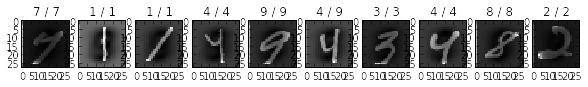

In [10]:
fig = plt.figure(figsize=(10,100))
for i,num in enumerate(toTest):
    a=fig.add_subplot(1,10,(i+1)) #NB the one based API sucks!
    a.set_title(str(y[num]) + " / " + str(preds[i]))
    plt.imshow(X[num,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))